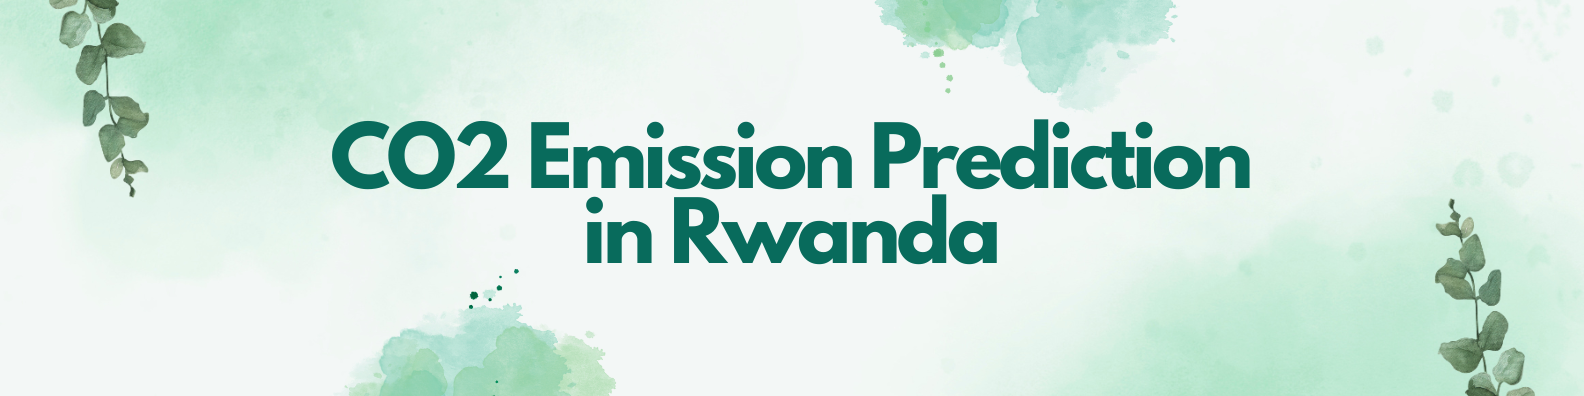

The "Prediction of CO2 Emissions in Rwanda" project delves into the intricate relationship between various socio-economic and environmental factors and their influence on carbon dioxide (CO2) emissions in the context of Rwanda. As one of the fastest-growing economies in East Africa, Rwanda's development trajectory presents both opportunities and challenges in terms of managing its carbon footprint and sustainable growth.

This project centers around conducting a comprehensive exploratory data analysis (EDA) to uncover meaningful insights and patterns within a diverse dataset. The primary objective is to build a foundation for developing accurate predictive models for CO2 emissions, thereby aiding policymakers, environmentalists, and stakeholders in making informed decisions to curb and mitigate the country's carbon emissions.

# IMPORTING LIBRARIES

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#map plot visualization
import folium
from folium import plugins
from IPython.display import display

#scaler
from sklearn.preprocessing import MinMaxScaler

#model selection
from sklearn.ensemble import RandomForestRegressor

#evaluation metrics
from sklearn.model_selection import cross_val_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


# IMPORTING DATASET

In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e20/test.csv')

# EXPLORATORY DATA ANALYSIS

In [3]:
train.shape

(79023, 76)

In [4]:
test.shape

(24353, 75)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

* All the columns are numerical so we will not have to deal with the categorical data.
* If we observe, except, ID, latitude, longitude, year, week_no and emissions rest of the columns have many null values. 
* Specifically, UvAerosal columns have around 99% values. Dropping them would be better. We'll look into them later...

In [6]:
train.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


**One notable inference from the above table is that emission ranges from 0 to 3168 and that's such a wide range. So, let's plot the graph to understand better**

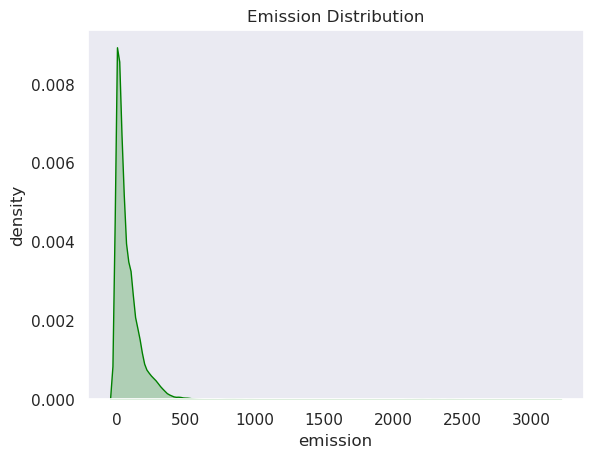

In [7]:
#Emission distribution using kdeplot
sns.set(style='dark')
sns.kdeplot(train['emission'], color='green',fill=True)

plt.title('Emission Distribution')
plt.xlabel('emission')
plt.ylabel('density')
plt.show()

**The most of the emission distribution lies between 0 to 400. This seems like there are too many outliers.**

Let's check the timeline of the data collected by checking the distinct values in the 'year' column.

In [8]:
train['year'].unique()

array([2019, 2020, 2021])

**So, the data collected is between 2019 to 2021.
Plotting boxplots of emission year-wise would help in checking the outliers.** 

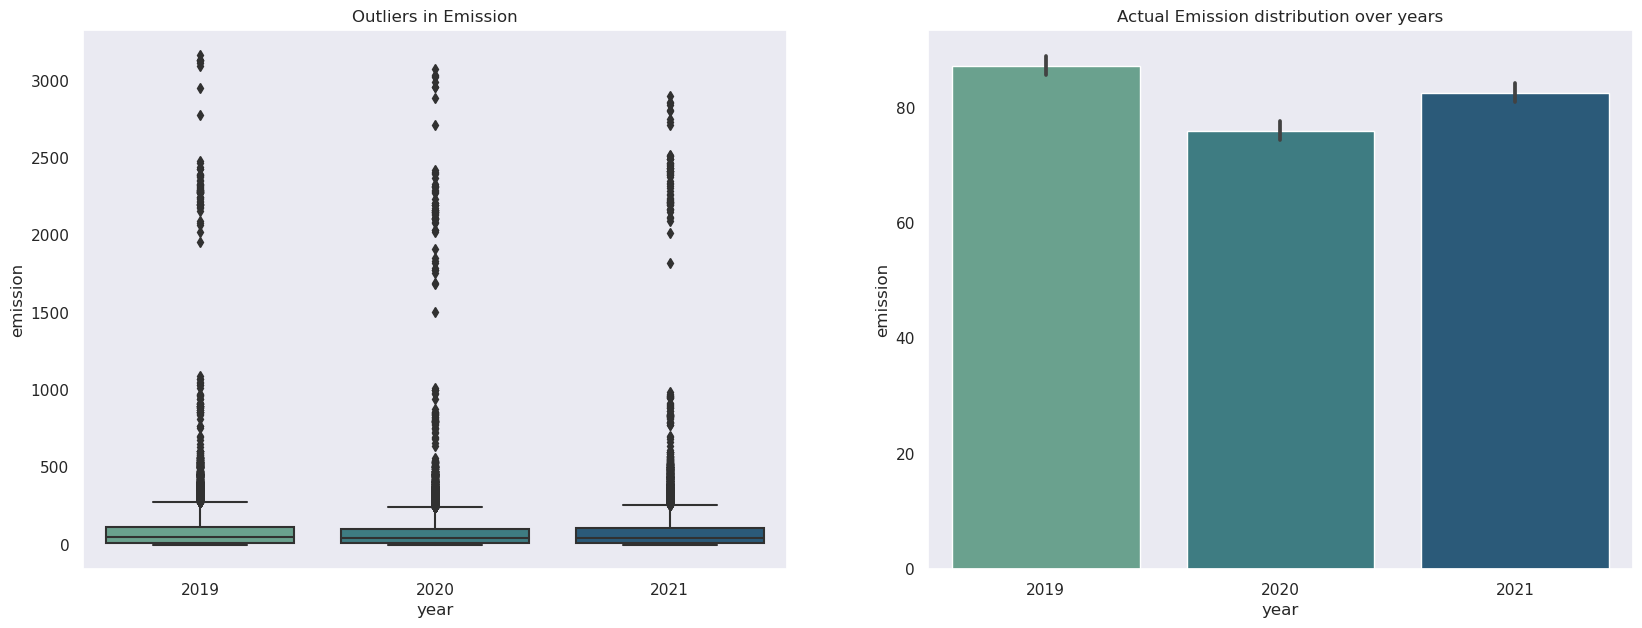

In [9]:
fig, ax=plt.subplots(1,2, width_ratios=[2,2],figsize=(20,7))
sns.boxplot(train, x='year',y='emission', palette='crest',ax=ax[0])
sns.barplot(train, x='year',y='emission', palette='crest',ax=ax[1])
ax[0].set_title('Outliers in Emission')
ax[1].set_title('Actual Emission distribution over years')

plt.show()


**We can see considerably low CO2 in the year 2020. This is evident due to the quarantine period of the Covid-19 pandemic.**

Let's also visualize the weekly CO2 emission over the years... 

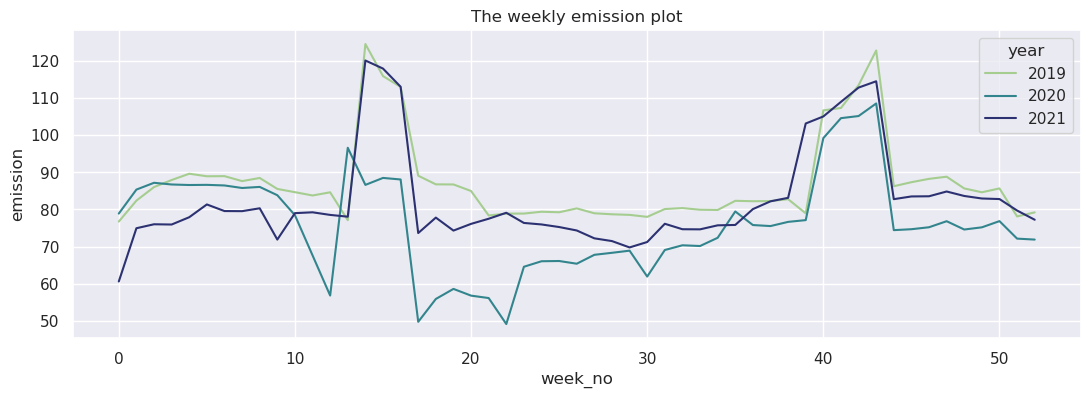

In [10]:
em_years = [2019, 2020, 2021] 
to_plot = train[train['year'].isin(em_years)]
final_plots = to_plot.groupby(['year', 'week_no'])['emission'].mean().reset_index()

plt.figure(figsize=(13,4))
sns.lineplot(final_plots,x='week_no',y='emission',hue='year',palette='crest')
plt.title('The weekly emission plot')
plt.grid()
plt.show()


* We observe a similar trend over months in all the three years. 
* There is a fall around week 18-38 that is April to August and that is the period of dry season in Rwanda. 
* The fall is even greater in the year 2020 and that is considerably due to Covid-19 pandemic period. 

Let's check the distinct geographical locations the data is collected from...

In [11]:
train.drop_duplicates(subset=['latitude', 'longitude']).shape[0]

497

**The data was collected from 497 different geographical locations.**

Let's locate no emission zones, the zones with zero CO2 emission

In [12]:
no_emission = train.groupby(['latitude', 'longitude'])['emission'].mean().to_frame()
no_emission = no_emission[no_emission['emission'] == 0]
no_emission


,,emission
latitude,longitude,
-2.898,29.002,0.0
-2.859,29.041,0.0
-2.841,29.159,0.0
-2.817,29.283,0.0
-2.496,28.504,0.0
-1.974,28.526,0.0
-1.839,28.761,0.0
-1.833,28.467,0.0
-1.730,28.470,0.0


In [13]:
no_emission.shape

(15, 1)

**There are 15 locations with absolutely zero emission**

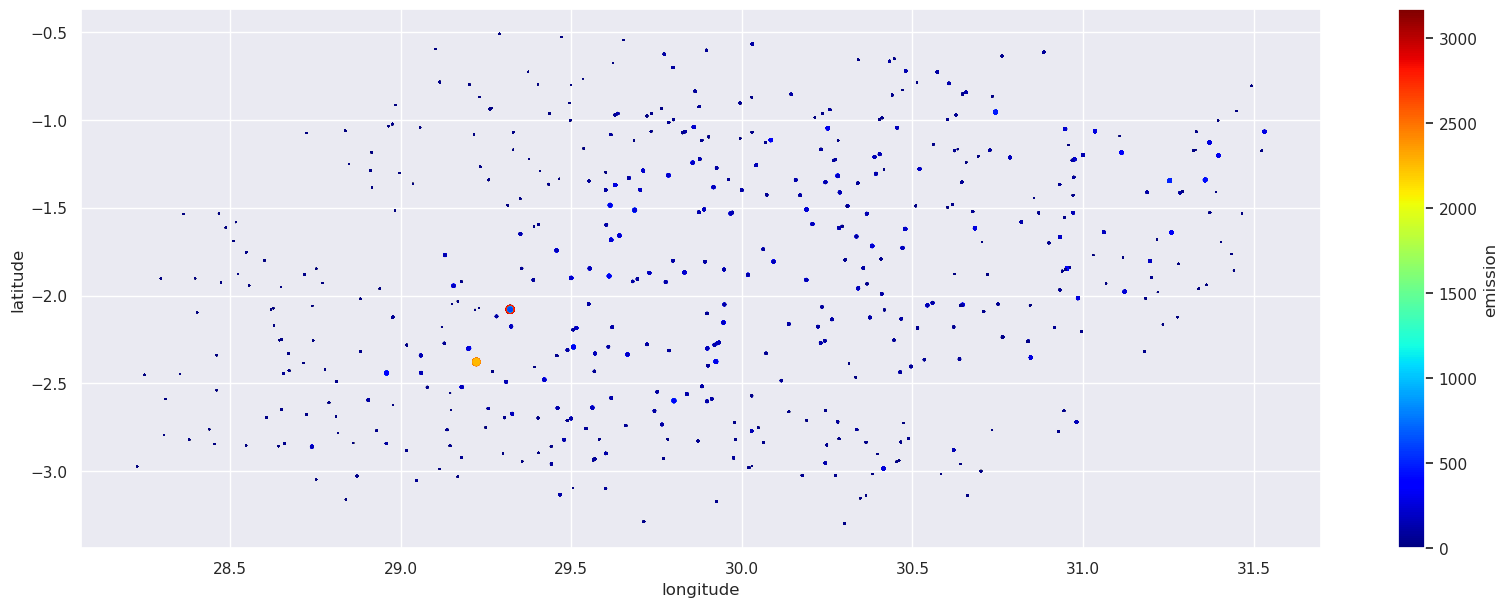

In [14]:
sns.set_style('dark')
train.plot(kind='scatter',x='longitude',y='latitude',grid=True,
                legend='true',s=train['emission']/100,c='emission',
               colorbar=True,cmap='jet',sharex=False, figsize=(20,7),)

plt.show()

There are two locations with extremely higher emissions than others

In [15]:
heatmap = folium.Map(location = [-2 , 30], zoom_start = 9)

geo_data = folium.plugins.HeatMap( 
    list(zip(train.latitude.values, train.longitude.values, train.emission.values)),
    min_opacity = 0.3, radius = 15, blur = 12, max_zoom = 1
)

heatmap.add_child(geo_data)


# TEST DATA ANALYSIS:

In [16]:
test.drop_duplicates(subset=['latitude', 'longitude']).shape[0]

497

**Test data is also measured from 497 different locations.**

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 8   SulphurDioxide_c

* The Test Data seems to have similar percentage of null values as Train data.
* UvAerosol feature should therefore be dropped. 

In [18]:
test['year'].unique()

array([2022])

In [19]:
test['week_no'].max()

48

**We need to predict CO2 emission of the first 48 weeks of the year 2022.**

**SUMMARY:**

* There are no categorical columns.
* The observations are measured from 2019 to 2021.
* CO2 emission range from 0 to 3168.
* UvAerosal feature has significantly high missing values.
* The data is collected from 497 different geographical locations.
* Emission values follow a common seasonal trend through years.
* There are 2 locations with extremely high emission records.
* Test data was measured from the same locations.
* The test data consists of first 48 weeks of 2022- that is what we'll have to predict.

# FEATURE ENGINEERING

**Dropping UvAerosole feature**
This group has over 99% of missing values and there is significant data drift between in these features in both train and test sets.

In [20]:
train.drop(columns=['UvAerosolLayerHeight_aerosol_pressure', 'UvAerosolLayerHeight_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_height', 'UvAerosolLayerHeight_aerosol_optical_depth', 'UvAerosolLayerHeight_sensor_zenith_angle', 'UvAerosolLayerHeight_sensor_azimuth_angle', 'UvAerosolLayerHeight_solar_azimuth_angle'], inplace=True)

In [21]:
test.drop(columns=['UvAerosolLayerHeight_aerosol_pressure', 'UvAerosolLayerHeight_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_height', 'UvAerosolLayerHeight_aerosol_optical_depth', 'UvAerosolLayerHeight_sensor_zenith_angle', 'UvAerosolLayerHeight_sensor_azimuth_angle', 'UvAerosolLayerHeight_solar_azimuth_angle'], inplace=True)

**Let's also Add Date**

In [22]:
train['date'] = pd.to_datetime(train['year'].astype(str) + '-' + train['week_no'].astype(str) + '-1', format='%Y-%W-%w')

In [23]:
test['date'] = pd.to_datetime(test['year'].astype(str) + '-' + train['week_no'].astype(str) + '-1', format='%Y-%W-%w')

**Let's fix the Covid year**

In [24]:
#Calculating the average montly emission of non-covid years
non_covid=train[train['year'].isin([2019,2021])].groupby('week_no')['emission'].mean()

#Calculating the average montly emission of Covid year
covid=train[train['year'].isin([2020])].groupby('week_no')['emission'].mean()

#ratio of covid and non-covid average emission
ratio=non_covid/covid

#multiplying each row in 2020 by the ratio of that week of that row
train.loc[train['year']==2020,'emission']*=train['week_no'].map(ratio)

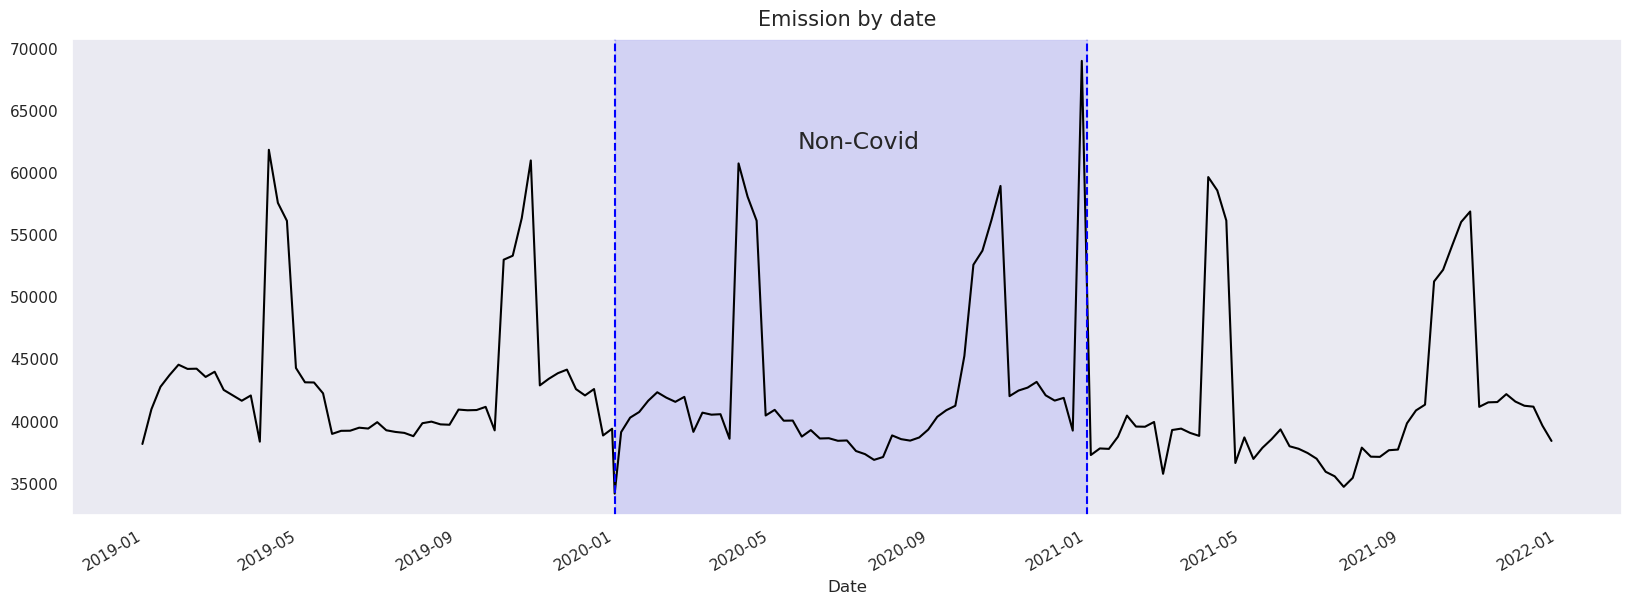

In [25]:
train.groupby(['date'])['emission'].sum().plot(kind='line', figsize=(20, 7), xlabel='Date',color='black')

plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-01-01'), color='blue', alpha=0.1)
plt.axvline(pd.Timestamp('2020-01-01'), linestyle = "--", color='blue')
plt.axvline(pd.Timestamp('2021-01-01'), linestyle = "--", color='blue')

plt.text(pd.Timestamp('2020-05-22'), 62000, "Non-Covid", size = 17)

plt.title('Emission by date', size=15, pad=10)
plt.show()

**There's a large spike in the last week of 2020. It's an outlier and need to be fixed.**

In [26]:
train.loc[(train['week_no']==52)&(train['year']==2020),'emission']=np.power(train.loc[(train['week_no']==52)&(train['year']==2020),'emission'],1/1.5)

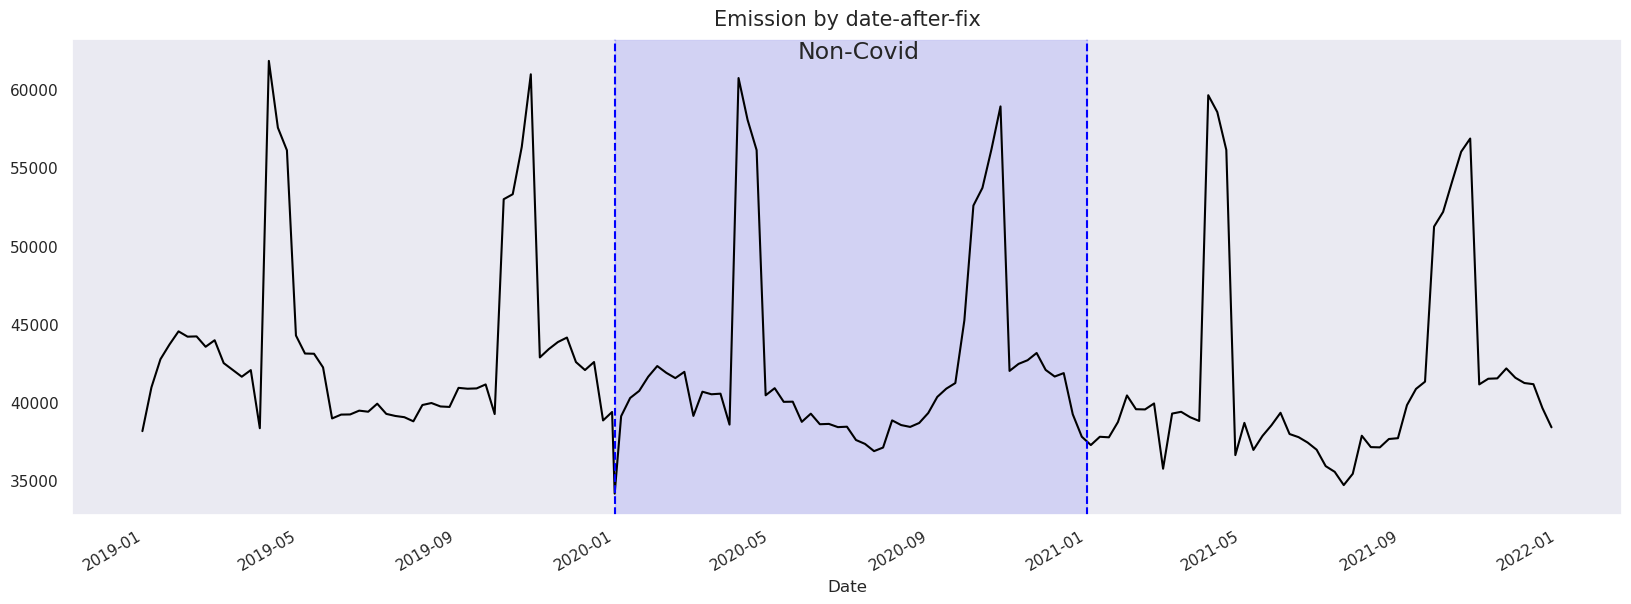

In [27]:
train.groupby(['date'])['emission'].sum().plot(kind='line', figsize=(20, 7), xlabel='Date',color='black')

plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-01-01'), color='blue', alpha=0.1)
plt.axvline(pd.Timestamp('2020-01-01'), linestyle = "--", color='blue')
plt.axvline(pd.Timestamp('2021-01-01'), linestyle = "--", color='blue')

plt.text(pd.Timestamp('2020-05-22'), 62000, "Non-Covid", size = 17)

plt.title('Emission by date-after-fix', size=15, pad=10)
plt.show()

**This gets the Covid year fixed!**

**Selecting the Features:**
Hand-picking few features that strongly contribute in CO2 emission

In [28]:
cols=['latitude','longitude','week_no','year']


# DATA PREPROCESSING

**Splitting Dataset**

In [29]:
x_train=train.drop(columns='emission')
y_train=train['emission']

**FEATURE SCALING**

In [30]:
scaler=MinMaxScaler()
x_trans=scaler.fit_transform(x_train[cols])
x_trans=pd.DataFrame(x_trans)
x_trans.head()

,0,1,2,3
0,1.0,0.321429,0.000000,0.0
1,1.0,0.321429,0.019231,0.0
2,1.0,0.321429,0.038462,0.0
3,1.0,0.321429,0.057692,0.0
4,1.0,0.321429,0.076923,0.0


In [31]:
sc=MinMaxScaler()
test_trans=sc.fit_transform(test[cols])
test_trans=pd.DataFrame(test_trans)
test_trans.head()

,0,1,2,3
0,1.0,0.321429,0.000000,0.0
1,1.0,0.321429,0.020833,0.0
2,1.0,0.321429,0.041667,0.0
3,1.0,0.321429,0.062500,0.0
4,1.0,0.321429,0.083333,0.0


# MODELING

In [32]:
model=RandomForestRegressor(random_state=42)
model.fit(x_trans,y_train)

RandomForestRegressor(random_state=42)

**MODEL EVALUATION**

In [33]:
cross_val=cross_val_score(model,x_trans,y_train,cv=5)
print(cross_val)
print(cross_val.mean())

[-1.52498241 -0.30402391 -0.19498195 -0.33321434 -1.33529832]
-0.7385001854490845


# PREDICTION:

In [34]:
pred=model.predict(test_trans)
pred

array([ 3.71396265,  4.06673254,  4.22525436, ..., 29.8139236 ,
       28.06006563, 23.13869522])

In [35]:
output=pd.DataFrame({'ID_LAT_LON_YEAR_WEEK':test['ID_LAT_LON_YEAR_WEEK'],'emission':pred})
output.to_csv('submission.csv',index=False)

So, That's it for the CO2 emission Prediction in Rwanda. These are my beginner-level submissions, seeking to learn and explore. If you feel it is insightful, tell me in the comments and please, correct me if I've misstated anything.

Thank you.